## Imports and OpenAI credentials

In [2]:
from openai.embeddings_utils import (
    get_embedding,
    distances_from_embeddings,
    tsne_components_from_embeddings,
    chart_from_components,
    indices_of_nearest_neighbors_from_distances,
)
import openai
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
import os
load_dotenv()


# constants
EMBEDDING_MODEL = "text-embedding-ada-002"

# OpenAI key
openai.api_key = os.environ.get('OPENAI_API_KEY')


## Functions

In [3]:
def embedding_from_string(
    string: str,
    model: str = EMBEDDING_MODEL,
) -> list:
    embedding = get_embedding(string, model)
    
    return embedding

def draw_distance_matrix(matrix, variables: list[str]):
    # Create heat map plot
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(matrix, cmap='coolwarm', vmin=np.max(matrix), vmax=np.min(matrix))
    
    # Add matrix values to plot
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            text = ax.text(j, i, round(matrix[i, j], 2),
                           ha="center", va="center", color="w")
            

    # Label x and y axis
    ax.set_xticks(np.arange(len(variables)))
    ax.set_yticks(np.arange(len(variables)))
    ax.set_xticklabels(variables)
    ax.set_yticklabels(variables)
    
    
    # Rotate labels in x axis for easier reading
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    
    # Add color legend
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Distance", rotation=-90, va="bottom")
    
    # Adjust margins to fit labels
    plt.subplots_adjust(left=0.25, bottom=0.25)
    
    # Save figure
    plt.savefig("sentence_matrix_distances.png")
    
    # Show plot
    plt.show()
    
def calculate_and_draw_distance_matrix(variables):
    distance_matrix = []
    embeddings = []
    
    # Calculate embeddings
    for variable in variables:
        embeddings.append(embedding_from_string(variable))
        
    # Calculate distance matrix
    for embedding in embeddings:
        distance_matrix.append(distances_from_embeddings(embedding, embeddings, distance_metric="cosine"))
        
    # Draw distance matrix
    draw_distance_matrix(np.array(distance_matrix), variables)
    

## Simple Embedding example

In [4]:
word = "Dog"
embeddings = embedding_from_string(word)
print(embeddings[0:10])

[-0.0010717936092987657, -0.015100661665201187, -0.018417904153466225, -0.02982633002102375, -0.01762465015053749, 0.012857917696237564, -0.005246290005743504, -0.0289321169257164, -0.017826568335294724, -0.021518804132938385]


## Comparing Word Embeddings

In [7]:
word_1 = "Dog"
u = embedding_from_string(word_1)
word_2 = "Cat"
v = embedding_from_string(word_2)
word_3 = "Car"
w = embedding_from_string(word_3)
distances = distances_from_embeddings(u, [u, v, w], distance_metric="cosine")
print("Distance between Dog and Dog: ", distances[0])
print("Distance between Dog and Cat: ", distances[1])
print("Distance between Dog and Car: ", distances[2])

Distance between Dog and Dog:  0
Distance between Dog and Cat:  0.120764065608434
Distance between Dog and Car:  0.16785903318393935


## Comparing Sentence Embeddings

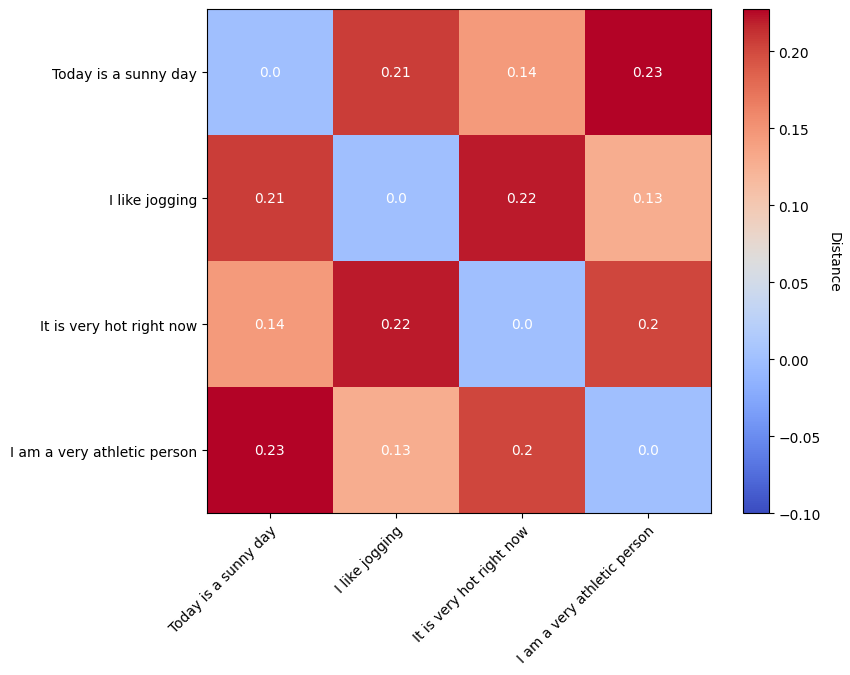

In [8]:
sentence_1 = "Today is a sunny day"

sentence_2 = "I like jogging"

sentence_3 = "It is very hot right now"

sentence_4 = "I am a very athletic person"



calculate_and_draw_distance_matrix([sentence_1, sentence_2, sentence_3, sentence_4])

## 2-D representation using t-SNE

Text(0.5, 1.0, '2-D representation of 12 sentences')

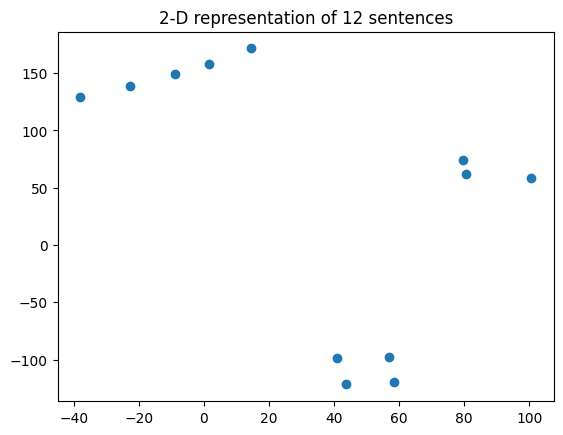

In [9]:
import pandas as pd
from sklearn.manifold import TSNE


sentences = ["Today is a sunny day", "It is very hot right now", "It might rain tomorrow", "The weather is very unpredictable",
             
             "I am a very athletic person", "I like jogging", "The 100 meters sprint world record is 9.8 seconds by Usain Bolt",
             
            "Pizza is an italian dish", "I prefer meat over fish", "My favourite food is steak", "I don't like vegetables", 
             "I don't usually order desert"
            ]
            
embeddings = []

# Calculate embeddings of sentences
for sentence in sentences:
    embeddings.append(embedding_from_string(sentence))

# Convert to np array
matrix = np.array(embeddings)

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=2, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

# Plot

x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

plt.scatter(x, y)
plt.title("2-D representation of 12 sentences")


In [5]:
words = []
words.append("Cybersecurity, Information Security, Data Protection, Threats, Protection Techniques")
words.append("Machine Learning, Production Engineering, Model Deployment, MLOps, Model Monitoring")
words.append("Model deployment, scalable infrastructure, workflow automation, MLOps practices, model monitoring.")
words.append("DevOps, General Concepts, Three Ways, Implementation, Metrics.")
words.append("Information Security Management, ISO 27001, Security Standards, Cybersecurity, IT Certifications.")
words.append("OSINT, Advanced Digital Espionage, Cyberpatrol, Internet Investigations, Privacy Protection.")
words.append("Angular, Web Development, Components, Routing, Forms.")
words.append("Programming language, Scratch, Game Development, Computational thinking, Online course.")
words.append("TikTok, Marketing, Promote, Business, Course.")
words.append("presentations, storytelling, communication, visual, public speaking.")
words.append("Recruitment, selection, interview, human resources, hiring.")

vectors = []
for word in words:
    vectors.append(embedding_from_string(word))
    
distances = distances_from_embeddings(vectors[0], vectors, distance_metric="cosine")

print(distances)

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE

# Convert to np array
matrix = np.array(vectors)

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=2, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

# Plot

x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

plt.scatter(x, y)
plt.title("2-D representation of 11 groups of keywords")
